In [5]:
# Task
Simulate rolling a die a variable number of times (from 1 to 50) and repeating each simulation 100, 500, 1000, 5000, 10000, 50000, and 100000 times. For each combination of die rolls and repetitions, calculate the sum of the rolls (excluding the case of a single die roll), plot and save a histogram of the sums, and calculate the mean and variance of the sums.

In [6]:
num_die_rolls = range(1, 51)
num_experiments = [100, 500, 1000, 5000, 10000, 50000, 100000]

In [7]:
import random

def simulate_die_rolls(num_rolls):
  total_sum = 0
  for _ in range(num_rolls):
    total_sum += random.randint(1, 6)
  return total_sum

In [12]:
simulate_die_rolls(1)

5

In [13]:
simulation_results = {}

for rolls in num_die_rolls:
    simulation_results[rolls] = {}
    for experiments in num_experiments:
        sums = []
        for _ in range(experiments):
            sums.append(simulate_die_rolls(rolls))
        simulation_results[rolls][experiments] = sums

In [14]:
import numpy as np

analysis_results = {}

for rolls, experiments_data in simulation_results.items():
    analysis_results[rolls] = {}
    for experiments, sums in experiments_data.items():
        # Exclude the case of a single die roll when calculating the sum
        if rolls > 1:
            mean_sum = np.mean(sums)
            variance_sum = np.var(sums)
            analysis_results[rolls][experiments] = {'mean': mean_sum, 'variance': variance_sum}
        else:
             analysis_results[rolls][experiments] = {'mean': None, 'variance': None} # Or handle appropriately for rolls = 1

In [15]:
import matplotlib.pyplot as plt

for rolls, experiments_data in simulation_results.items():
    for experiments, sums in experiments_data.items():
        if rolls > 1:
            plt.figure(figsize=(10, 6))
            plt.hist(sums, bins='auto', edgecolor='black')
            plt.title(f"Histogram of Sums for {rolls} Die Rolls ({experiments} Experiments)")
            plt.xlabel("Sum of Die Rolls")
            plt.ylabel("Frequency")
            plt.savefig(f"histogram_rolls_{rolls}_experiments_{experiments}.png")
            plt.close()

In [16]:
import pandas as pd

# Create a DataFrame from the analysis_results dictionary
analysis_df = pd.DataFrame.from_dict(analysis_results, orient='index')

# Restructure the DataFrame
# Stack the experiments columns to long format
analysis_df_stacked = analysis_df.stack().reset_index()
analysis_df_stacked.columns = ['num_rolls', 'num_experiments', 'metrics']

# Expand the metrics dictionary into separate columns
analysis_df_restructured = pd.json_normalize(analysis_df_stacked['metrics']).set_index(analysis_df_stacked['num_rolls'])
analysis_df_restructured['num_experiments'] = analysis_df_stacked['num_experiments'].values

# Reorder columns
analysis_df_restructured = analysis_df_restructured[['num_experiments', 'mean', 'variance']]

display(analysis_df_restructured.sample(10))

num_experiments       mean    variance
num_rolls                                        
13                     500   45.54000   37.064400
46                     500  159.80400  132.761584
45                     100  158.26000  148.692400
50                  100000  174.97228  144.977592
33                   10000  115.59850   95.484898
22                    1000   77.23100   69.115639
47                   10000  164.45060  136.531760
33                  100000  115.46813   95.835544
40                   50000  140.02270  116.518225
45                    1000  156.93700  132.701031

In [17]:
analysis_df_restructured.to_csv('analysis_results.csv')

In [18]:
n_trials = 100
n_successes = 97

In [19]:
from scipy.stats import binom

success_rates = [0.9, 0.95, 0.97, 0.99]
distributions = {}

for p in success_rates:
    distributions[p] = binom.rvs(n_trials, p, size=10000)


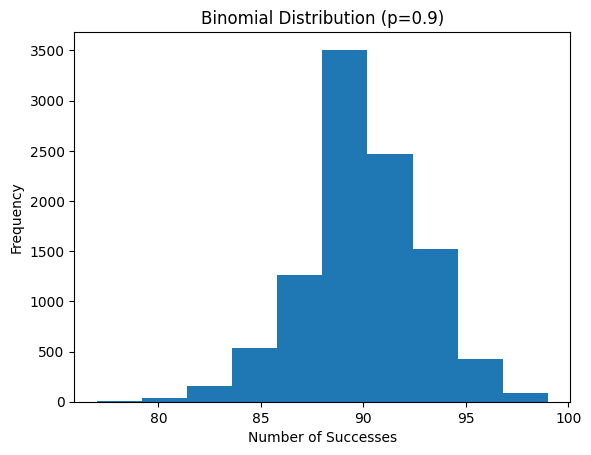

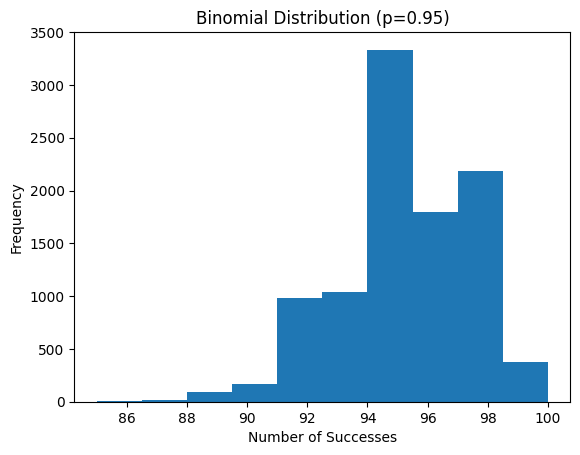

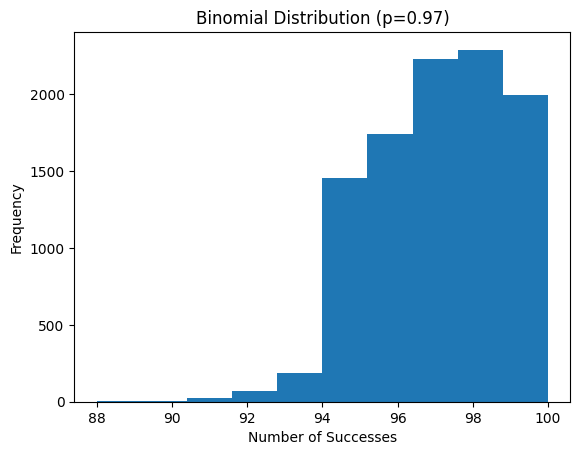

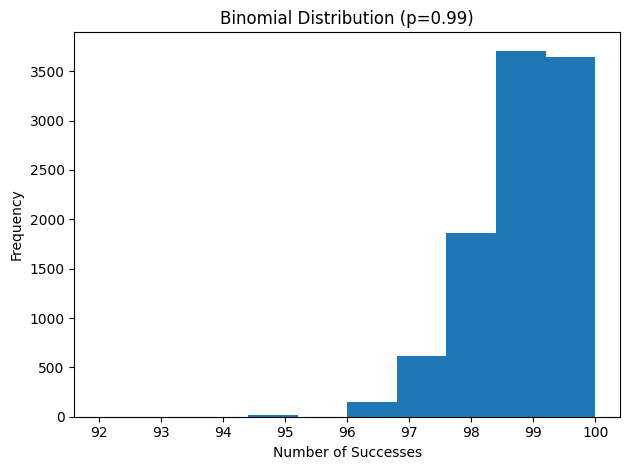

In [20]:
import matplotlib.pyplot as plt

for p, dist in distributions.items():
    plt.figure()
    plt.hist(dist)
    plt.title(f'Binomial Distribution (p={p})')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

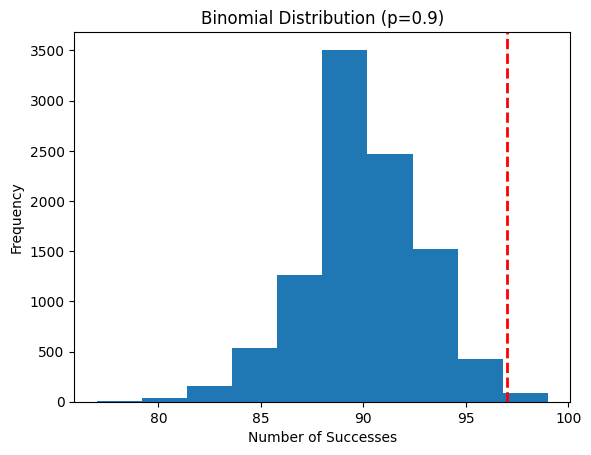

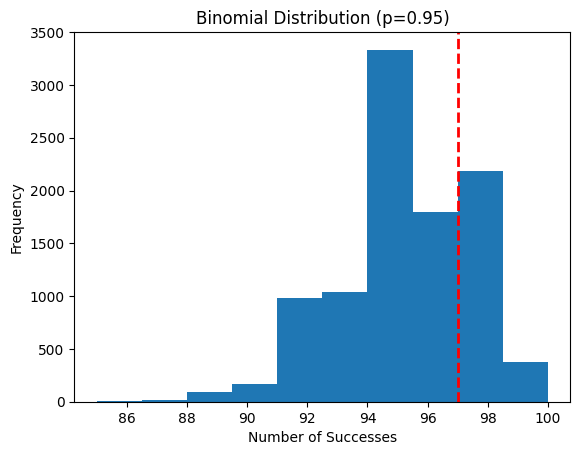

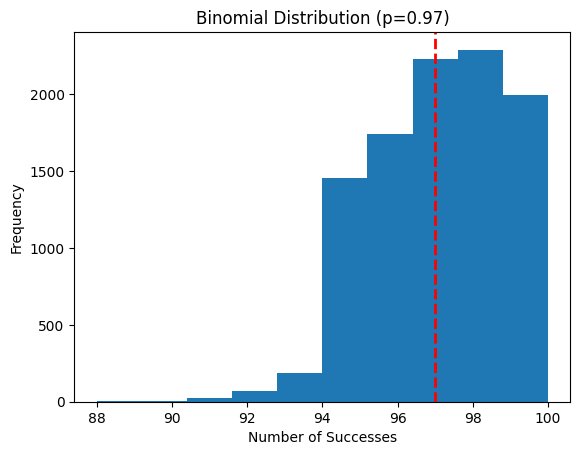

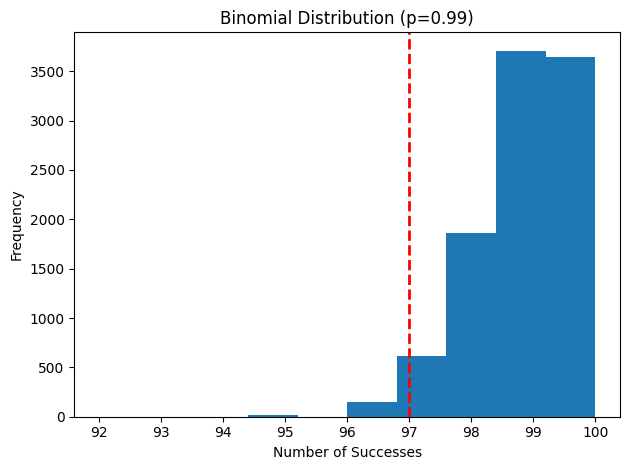

In [21]:
for p, dist in distributions.items():
    plt.figure()
    plt.hist(dist)
    plt.axvline(n_successes, color='red', linestyle='dashed', linewidth=2)
    plt.title(f'Binomial Distribution (p={p})')
    plt.xlabel('Number of Successes')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# Load the datasets
try:
    housing_df = pd.read_csv(r"D:\PycharmProjects\pythonProject\U23AI113\ML_lAB\LAB_1\Housing.csv")
    advertising_df = pd.read_csv(r"D:\PycharmProjects\pythonProject\U23AI113\ML_lAB\LAB_1\advertising.csv")
    faa_ai_prelim_df = pd.read_csv(r"D:\PycharmProjects\pythonProject\U23AI113\ML_lAB\LAB_2\faa_ai_prelim.csv")
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("Make sure the datasets are in the correct directory.")

Datasets loaded successfully.


In [23]:
import numpy as np

def calculate_entropy(data):# data -> column
    """
    Calculates the entropy of a given pandas Series.
    """
    if data.isnull().all():
        return 0.0  # Handle cases with all NaN values

    value_counts = data.value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts + 1e-9))  # Add epsilon to avoid log(0)
    return entropy

In [24]:
# Identify continuous and categorical columns
def identify_column_types(df):
    continuous_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    return continuous_cols, categorical_cols

# Calculate entropy for each column
entropy_results = {}

for df_name, df in zip(['housing', 'advertising', 'faa_ai_prelim'], [housing_df, advertising_df, faa_ai_prelim_df]):
    entropy_results[df_name] = {}
    continuous_cols, categorical_cols = identify_column_types(df)

    for col in categorical_cols:
        entropy_results[df_name][col] = calculate_entropy(df[col])

    for col in continuous_cols:
        # Bin continuous data (using quantiles for simplicity)
        if not df[col].isnull().all():
            try:
                binned_data = pd.qcut(df[col], q=10, labels=False, duplicates='drop')
                entropy_results[df_name][col] = calculate_entropy(binned_data)
            except ValueError:
                # Handle cases where quantiles cannot be computed (e.g., all values are the same)
                entropy_results[df_name][col] = 0.0 # Set entropy to 0 if binning is not possible
        else:
            entropy_results[df_name][col] = 0.0 # Handle columns with all NaN values

In [25]:
# Present results
for df_name, results in entropy_results.items():
    print(f"Entropy results for {df_name} dataset:")
    for col, entropy in results.items():
        print(f"  {col}: {entropy:.4f}")
    print("-" * 30)

Entropy results for housing dataset:
  mainroad: 0.5876
  guestroom: 0.6756
  basement: 0.9345
  hotwaterheating: 0.2686
  airconditioning: 0.8995
  prefarea: 0.7864
  furnishingstatus: 1.5573
  price: 3.3202
  area: 3.3153
  bedrooms: 1.5364
  bathrooms: 0.1425
  stories: 0.7485
  parking: 0.8638
------------------------------
Entropy results for advertising dataset:
  TV: 3.3219
  Radio: 3.3212
  Newspaper: 3.3219
  Sales: 3.3205
------------------------------
Entropy results for faa_ai_prelim dataset:
  UPDATED: 0.2243
  ENTRY_DATE: 2.7897
  EVENT_LCL_DATE: 3.8502
  EVENT_LCL_TIME: 6.1973
  LOC_CITY_NAME: 6.2787
  LOC_STATE_NAME: 4.3330
  LOC_CNTRY_NAME: -0.0000
  RMK_TEXT: 6.3268
  EVENT_TYPE_DESC: 0.9101
  FSDO_DESC: 5.2054
  REGIST_NBR: 6.3750
  FLT_NBR: 2.5850
  ACFT_OPRTR: 2.5216
  ACFT_MAKE_NAME: 3.8938
  ACFT_MODEL_NAME: 5.5629
  ACFT_DMG_DESC: 1.8199
  FLT_ACTIVITY: 2.0382
  FLT_PHASE: 1.8600
  MAX_INJ_LVL: 1.8474
  FATAL_FLAG: -0.0000
  ACFT_MISSING_FLAG: 0.0000
  FAR_PART: